In [1]:
#Necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [2]:
# Loading the data  
car_data = pd.read_csv('CarData.csv') 

In [3]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
#check the first few rows of the dataset
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
## Getting some information about the dataset 
car_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# encoding Columns(Categorical varaible into numerical varaible before applying regression algorithm) 
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True) 
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True) 
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True) 

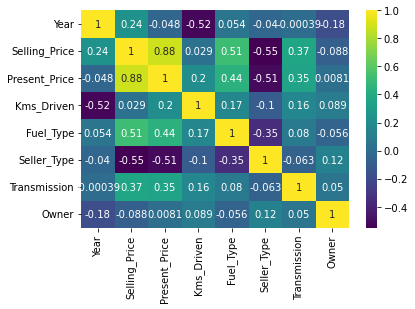

In [7]:
#plot a correlation matrix(Understand relation between different attributes in the dataset)
corrMatrix = car_data.corr() 
sns.heatmap(corrMatrix, annot=True, cmap='viridis') 
plt.show() 

In [8]:
#Splitting the Dataset(For traning and testing the model) 
X = car_data.drop(['Car_Name','Selling_Price'],axis=1) 
Y = car_data['Selling_Price'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42) 

In [9]:
# loading the linear regression model 
lin_reg_model = LinearRegression() 
#Now fit the model to our dataset 
lin_reg_model.fit(X_train,Y_train) 

LinearRegression()

In [10]:
# prediction on Training data 
training_data_prediction = lin_reg_model.predict(X_train) 

In [11]:
# R squared Error 
train_error_score = metrics.r2_score(Y_train, training_data_prediction) 
print("R squared Error - Training : ", train_error_score) 

R squared Error - Training :  0.8839793496750802


In [12]:
# prediction on Testing data 
Y_pred = lin_reg_model.predict(X_test) 

In [13]:
# R squared Error 
test_error_score = metrics.r2_score(Y_test, Y_pred) 
print("R squared Error - Test: ", test_error_score) 

R squared Error - Test:  0.8468053957656769


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

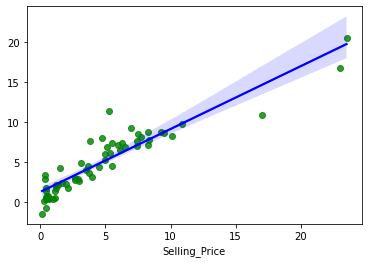

In [14]:
# create scatterplot with regression line 
sns.regplot(Y_test, Y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 